<a href="https://colab.research.google.com/github/annisajumalia/202055202012-annisajumalia/blob/master/penyakitdaunjagung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.optimizers
import tensorflow as tf

import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import accuracy_score, classification_report

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
data = pd.read_csv("/content/drive/MyDrive/dataset/dataset-jagung/data-excel/PenyakitDaunJagung.csv")
data.head()

# /content/drive/MyDrive/dataset/dataset-jagung/data-excel/hawar_daun.xlsx
# /content/drive/MyDrive/dataset/dataset-jagung/data-excel/bercak_daun.xlsx
# /content/drive/MyDrive/dataset/dataset-jagung/data-excel/Karatan_daun.xlsx

image                                         labels  \
0  Hawar&Karat&karatan-65.jpg  ['Hawar Daun', 'Bercak Daun', 'Karatan Daun']   
1              bercak-309.jpg                                ['Bercak Daun']   
2                hawar-46.jpg                                 ['Hawar Daun']   
3        Bercak&Karatan-9.jpg                ['Bercak Daun', 'Karatan Daun']   
4             karatan-190.jpg                               ['Karatan Daun']   

   Hawar Daun  Bercak Daun  Karatan Daun  
0           1            1             1  
1           0            1             0  
2           1            0             0  
3           0            1             1  
4           0            0             1

In [69]:
import pandas as pd

# Path ke file Excel
path_bercak = '/content/drive/MyDrive/dataset/dataset-jagung/data-excel/bercak_daun.xlsx'
path_hawar = '/content/drive/MyDrive/dataset/dataset-jagung/data-excel/hawar_daun.xlsx'
path_karatan = '/content/drive/MyDrive/dataset/dataset-jagung/data-excel/Karatan_daun.xlsx'

# Membaca data dari masing-masing file Excel
df_bercak = pd.read_excel(path_bercak)
df_hawar = pd.read_excel(path_hawar)
df_karatan = pd.read_excel(path_karatan)

# Menggabungkan data
df_gabungan = pd.concat([df_bercak, df_hawar, df_karatan], ignore_index=True)

# Menyimpan data gabungan ke file Excel baru
output_path = '/content/drive/MyDrive/dataset/dataset-jagung/data-excel/singleObjectDetection.xlsx'
df_gabungan.to_excel(output_path, index=False)

print("Data berhasil digabungkan dan disimpan di:", output_path)

Data berhasil digabungkan dan disimpan di: /content/drive/MyDrive/dataset/dataset-jagung/data-excel/singleObjectDetection.xlsx


In [70]:
data = pd.read_excel('/content/drive/MyDrive/dataset/dataset-jagung/data-excel/singleObjectDetection.xlsx')
data.head()

image           labels  Hawar Daun  Bercak Daun  Karatan Daun
0  bercak-1.jpg  ['Bercak Daun']           0            1             0
1  bercak-2.jpg  ['Bercak Daun']           0            1             0
2  bercak-3.jpg  ['Bercak Daun']           0            1             0
3  bercak-4.jpg  ['Bercak Daun']           0            1             0
4  bercak-5.jpg  ['Bercak Daun']           0            1             0

In [71]:
# prompt: total data

print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image         983 non-null    object
 1   labels        983 non-null    object
 2   Hawar Daun    983 non-null    int64 
 3   Bercak Daun   983 non-null    int64 
 4   Karatan Daun  983 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.5+ KB
None
       Hawar Daun  Bercak Daun  Karatan Daun
count  983.000000   983.000000    983.000000
mean     0.305188     0.340793      0.354018
std      0.460721     0.474217      0.478458
min      0.000000     0.000000      0.000000
25%      0.000000     0.000000      0.000000
50%      0.000000     0.000000      0.000000
75%      1.000000     1.000000      1.000000
max      1.000000     1.000000      1.000000


In [72]:
data = data[:983]
len(data)

983

In [73]:
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from PIL import ImageFile
import numpy as np

# Allow loading of truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

image_size = 224
image_list = []
invalid_images = []

# Loop through the dataset and load images
for i in tqdm(range(data.shape[0])):
    try:
        img = image.load_img('/content/drive/MyDrive/dataset/dataset-jagung/images/' + data['image'][i], target_size=(image_size, image_size, 3))
        img = image.img_to_array(img)
        img = img / 255.0
        image_list.append(img)
    except (OSError, ValueError) as e:
        print(f"Error loading image {data['image'][i]}: {e}")
        invalid_images.append(i)

# Remove invalid images from the DataFrame
data = data.drop(invalid_images).reset_index(drop=True)

# Convert the list of images to a NumPy array
X = np.array(image_list)

100%|██████████| 983/983 [02:01<00:00,  8.09it/s]


In [74]:
image_list = np.array(image_list)
print(image_list)

[[[[0.7921569  0.7254902  0.64705884]
   [0.78039217 0.73333335 0.64705884]
   [0.7607843  0.7372549  0.6431373 ]
   ...
   [0.68235296 0.7764706  0.7137255 ]
   [0.68235296 0.7764706  0.7137255 ]
   [0.68235296 0.7764706  0.7137255 ]]

  [[0.7372549  0.6745098  0.58431375]
   [0.7254902  0.6666667  0.5764706 ]
   [0.70980394 0.6627451  0.5686275 ]
   ...
   [0.68235296 0.7764706  0.7137255 ]
   [0.68235296 0.7764706  0.7137255 ]
   [0.6745098  0.76862746 0.7058824 ]]

  [[0.7294118  0.6431373  0.5529412 ]
   [0.72156864 0.63529414 0.54509807]
   [0.7254902  0.6392157  0.54901963]
   ...
   [0.68235296 0.7764706  0.7137255 ]
   [0.68235296 0.7764706  0.7137255 ]
   [0.6745098  0.76862746 0.7058824 ]]

  ...

  [[0.30980393 0.38431373 0.20784314]
   [0.30980393 0.38431373 0.20784314]
   [0.30980393 0.38431373 0.20784314]
   ...
   [0.3647059  0.3372549  0.27450982]
   [0.30980393 0.27450982 0.21568628]
   [0.33333334 0.29803923 0.23921569]]

  [[0.3019608  0.3764706  0.2       ]
   [0.3

In [75]:
#Categorical Data
y = data[['Hawar Daun', 'Bercak Daun', 'Karatan Daun']].values
y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [76]:
x_train, x_testval, y_train, y_testval = train_test_split(image_list, y, test_size=0.2, random_state=42) #80% Train, 10% Validation, 10% Test
x_val, x_test, y_val, y_test = train_test_split(x_testval, y_testval, test_size=0.5, random_state=42)

In [77]:
import keras
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [78]:
model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

In [79]:
# Tambahkan lapisan tambahan ke model base Anda
x = GlobalAveragePooling2D()(model.output)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(3, activation='sigmoid')(x)

In [80]:
model = keras.models.Model(inputs=model.input, outputs=output)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_282 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_288   │ (None, 111, 111, 32)   │             96 │ conv2d_282[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_282            │ (None, 111, 111, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_283 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_282[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_289   │ (None, 109, 109, 32)   │             96 │ conv2d_283[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_283            │ (None, 109, 109, 32)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_284 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_283[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_290   │ (None, 109, 109, 64)   │            192 │ conv2d_284[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_284            │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_12          │ (None, 54, 54, 64)     │              0 │ activation_284[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_285 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_291   │ (None, 54, 54, 80)     │            240 │ conv2d_285[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_285            │ (None, 54, 54, 80)     │              0 │ batch_normalization_2… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_286 (Conv2D)  

 Total params: 22,074,275 (84.21 MB)

 Trainable params: 22,039,459 (84.07 MB)

 Non-trainable params: 34,816 (136.00 KB)

In [81]:
# optimizer = keras.optimizers.Adam(learning_rate=0.0001)

# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Tambahkan callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)


In [82]:
# history = model.fit(x_train,
#                     y_train,
#                     epochs=20,
#                     batch_size=64,
#                     validation_data=(x_val, y_val)
#                     )

# Train model
history = model.fit(x_train,
                          y_train,
                          epochs=40,
                          batch_size=16,
                          validation_data=(x_val, y_val),
                          callbacks=[early_stopping, reduce_lr])

Epoch 1/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.5143 - loss: 0.7507 - val_accuracy: 0.5204 - val_loss: 0.7996 - learning_rate: 0.0010
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.7134 - loss: 0.4768 - val_accuracy: 0.6939 - val_loss: 3.0800 - learning_rate: 0.0010
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.7730 - loss: 0.3950 - val_accuracy: 0.6735 - val_loss: 1.8225 - learning_rate: 0.0010
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.7162 - loss: 0.4995 - val_accuracy: 0.4694 - val_loss: 7.7325 - learning_rate: 0.0010
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.7603 - loss: 0.4137 - val_accuracy: 0.6837 - val_loss: 0.9416 - learning_rate: 0.0010
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.8441 - loss: 0.3260 - val_accuracy: 0.6224 - val_loss: 1.2895 - learning_rate: 0.0010
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - accuracy: 0.9036 - loss: 0.2276

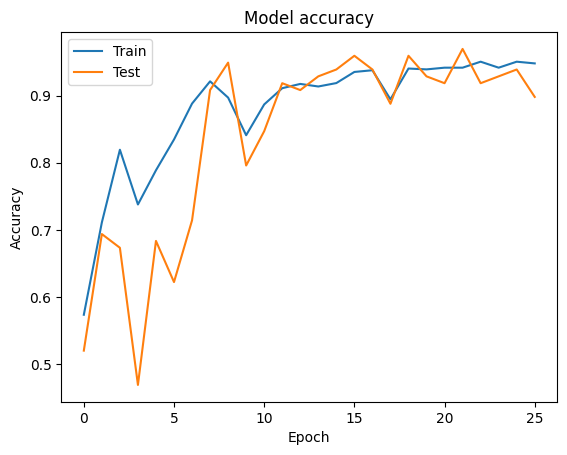

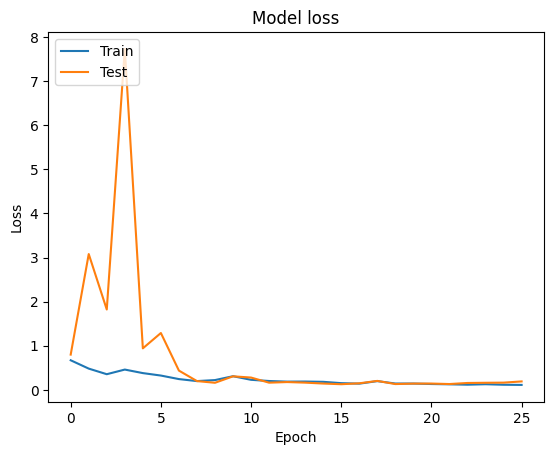

In [83]:
# prompt: tampilkan # Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step
Accuracy: 0.9595959595959596
              precision    recall  f1-score   support

  Hawar Daun       0.94      1.00      0.97        33
 Bercak Daun       0.97      0.92      0.94        37
Karatan Daun       0.97      0.97      0.97        29

   micro avg       0.96      0.96      0.96        99
   macro avg       0.96      0.96      0.96        99
weighted avg       0.96      0.96      0.96        99
 samples avg       0.96      0.96      0.96        99



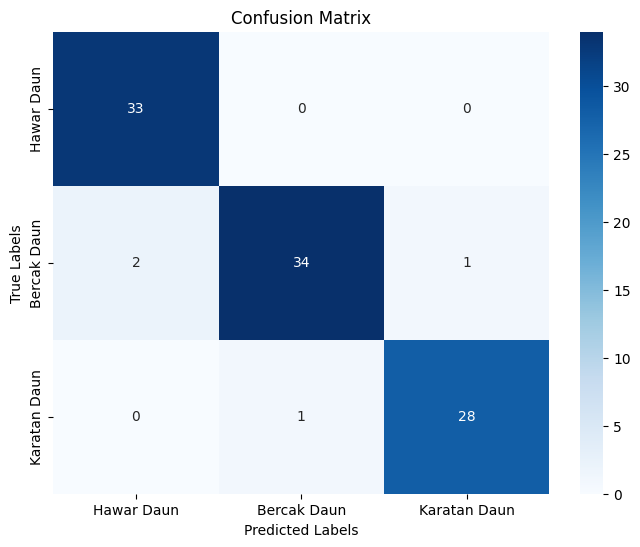

In [84]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Asumsikan x_test dan y_test sudah tersedia

# Evaluasi model pada test set
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Konversi probabilitas menjadi label kelas

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

# Buat laporan klasifikasi
print(classification_report(y_test, y_pred_classes, target_names=['Hawar Daun', 'Bercak Daun', 'Karatan Daun']))

# Buat confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_classes.argmax(axis=1))

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Hawar Daun', 'Bercak Daun', 'Karatan Daun'], yticklabels=['Hawar Daun', 'Bercak Daun', 'Karatan Daun'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [85]:
# Simpan Model Tflite
# Menyimpan model dalam format tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model tflite ke file
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmp0hviegpu'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_957')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135903495176656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903495176272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903495179344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903495177808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903495178768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906144289424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906144298640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135903495179152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906144297872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135906144300944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1359061442

In [86]:
# prompt: simpan juga labels.txt nya

# Simpan labels.txt
with open('labels.txt', 'w') as f:
  f.write('Hawar Daun\n')
  f.write('Bercak Daun\n')
  f.write('Karatan Daun\n')

# Code to save the model to your Google Drive (optional)
from google.colab import drive
drive.mount('/content/drive')

!cp model.tflite /content/drive/MyDrive/
!cp labels.txt /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Hasil Prediksi (Diurutkan berdasarkan Probabilitas):
1. Hawar Daun: 99.10%
2. Bercak Daun: 3.25%
3. Karatan Daun: 2.15%


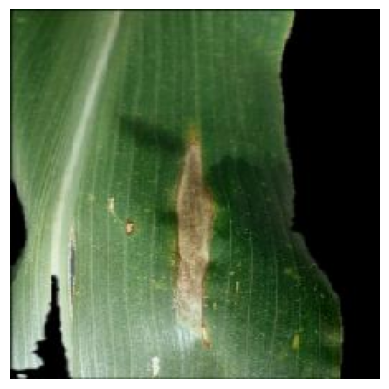

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load dan preprocess gambar
img_path = '/content/drive/MyDrive/dataset/dataset-jagung/hawar/hawar-10.jpg'
img = image.load_img(img_path, target_size=(image_size, image_size))
img = image.img_to_array(img)
img = img / 255.0

# Prediksi
proba = model.predict(img.reshape(1, image_size, image_size, 3))
classes = np.array(['Hawar Daun', 'Bercak Daun', 'Karatan Daun'])  # Gantilah sesuai dengan kelas Anda

# Gabungkan kelas dan probabilitas ke dalam satu list
class_proba = list(zip(classes, proba[0]))

# Urutkan berdasarkan probabilitas (dari tertinggi ke terendah)
class_proba_sorted = sorted(class_proba, key=lambda x: x[1], reverse=True)

# Tampilkan hasil peringkat
print("Hasil Prediksi (Diurutkan berdasarkan Probabilitas):")
for i, (class_name, probability) in enumerate(class_proba_sorted):
    print(f"{i+1}. {class_name}: {probability*100:.2f}%")

# Tampilkan gambar
plt.imshow(img)
plt.axis('off')  # Sembunyikan sumbu
plt.show()

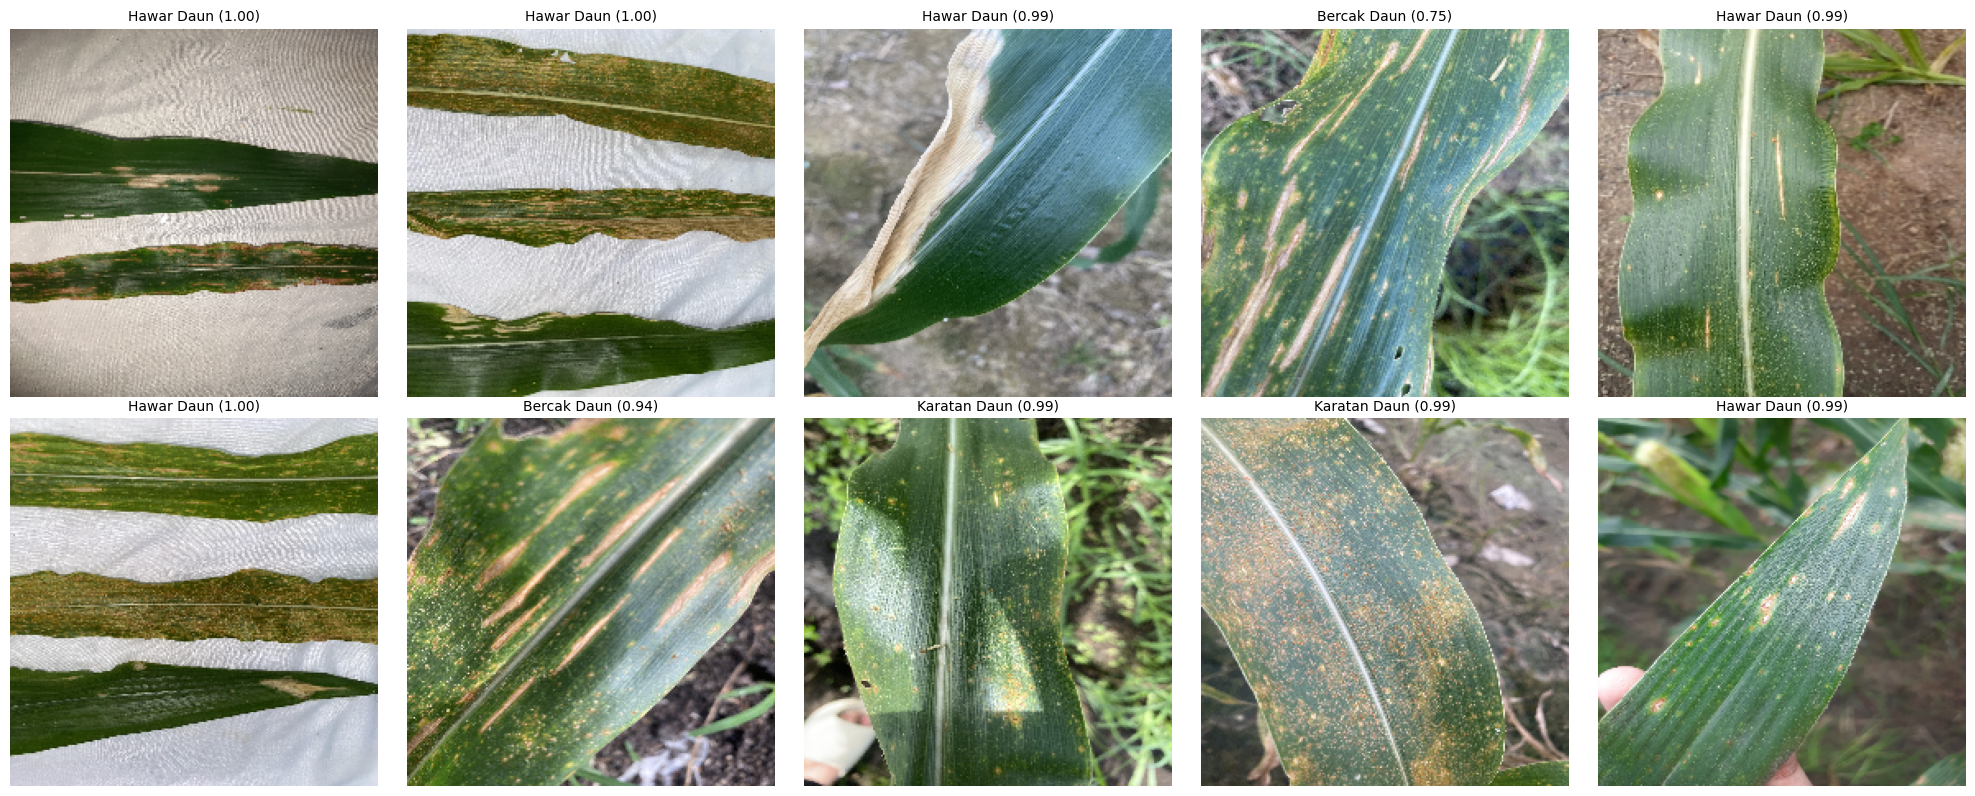

In [88]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
import random

# Muat model TFLite
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Dapatkan input dan output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Path dataset dan ambil daftar file gambar dari semua subfolder
dataset_path = '/content/drive/MyDrive/dataset/dataset-jagung/'
image_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.jpg'):
            image_files.append(os.path.join(root, file))

# Pilih 10 gambar secara acak
sample_files = random.sample(image_files, 10)

# Fungsi untuk memproses gambar dan melakukan prediksi
def predict_image(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(image_size, image_size))
    img = image.img_to_array(img)
    img = img / 255.0

    # Predict
    interpreter.set_tensor(input_details[0]['index'], img.reshape(1, image_size, image_size, 3).astype(np.float32))
    interpreter.invoke()
    proba = interpreter.get_tensor(output_details[0]['index'])[0]

    # Apply threshold
    threshold = 0.5
    classes = np.array(data.columns[2:])
    top_classes = [classes[i] for i in range(len(proba)) if proba[i] > threshold]
    top_proba = [proba[i] for i in range(len(proba)) if proba[i] > threshold]

    return img, top_classes, top_proba

# Setup plot
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

# Predict and plot images
for ax, file_name in zip(axes, sample_files):
    img_path = file_name
    img, top_classes, top_proba = predict_image(img_path)

    ax.imshow(img)
    ax.axis('off')
    result_str = ', '.join([f"{cls} ({p:.2f})" for cls, p in zip(top_classes, top_proba)])
    ax.set_title(result_str, fontsize=10)

plt.tight_layout()
plt.show()
